In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [2]:
def sol(a,b,c,nu,ns,t1,t2,t3,tau,h):
    if b!=0:
        l1 = (a+c+sqrt((a-c)**2+4*b**2))/2
        l2 = (a+c-sqrt((a-c)**2+4*b**2))/2
        c1 = (a-c+sqrt((a-c)**2+4*b**2))/(2*sqrt((a-c)**2+4*b**2))
        c2 = b/sqrt((a-c)**2+4*b**2)
        c3 = -(a-c-sqrt((a-c)**2+4*b**2))/(2*sqrt((a-c)**2+4*b**2))
        c4 = -c2
    else:
        l1 = a
        l2 = c
        c1 = 1
        c2 = 0
        c3 = 0
        c4 = 1

    def phi1(x):
        if nu == 1:
            return sin(2*pi*x)
        elif nu == 2:
            return 1-fabs(2*(x-1/2))
        elif nu == 3:
            if x<=1/2:
                return 0
            else:
                return 1

    def phi2(x):
        if nu == 1:
            return cos(2*pi*x)
        elif nu == 2:
            return sin(2*pi*x)+0.1*sin(100*pi*x)
        elif nu == 3:
            if x<=1/5 or x>=4/5:
                return 0
            elif x<=2/5 or x>=3/5:
                return 1/2
            else:
                return 1

    def psi1(x):
        return c1*phi1(x)+c2*phi2(x)
    def psi2(x):
        return c3*phi1(x)+c4*phi2(x)

    v1 = np.zeros(N+1)
    v01 = np.zeros(N+1)
    vt11 = np.zeros(N+1)
    vt21 = np.zeros(N+1)
    v2 = np.zeros(N+1)
    v02 = np.zeros(N+1)
    vt12 = np.zeros(N+1)
    vt22 = np.zeros(N+1)

    for i in range(0,N+1):
        v01[i] = psi1(i*h)
        v1[i] = v01[i]
        v02[i] = psi2(i*h)
        v2[i] = v02[i]
    
    if ns == 1:
        ga1 = l1*tau/h
        ga2 = l2*tau/h
        for i in range(0,T+1):
            for j in range(0,N):
                v1[j] = (1-ga1)*v1[j]+ga1*v1[j+1]
                v2[j] = (1-ga2)*v2[j]+ga2*v2[j+1]
                
            v1[N] = v1[0]
            v2[N] = v2[0]
            
            if round(i*tau,4) == t1:
                for j in range(0,N+1):
                    vt11[j] = v1[j]
                    vt12[j] = v2[j]
            elif round(i*tau,4) == t2:
                for j in range(0,N+1):
                    vt21[j] = v1[j]
                    vt22[j] = v2[j]
    else:
        p = np.zeros(N+1)
        q = np.zeros(N+1)
        al = np.zeros(N+1)
        be = np.zeros(N+1)
        ga = np.zeros(N+1)
        ai = l1*tau/(2*h)
        bi = -ai
        ci = 1
        for j in range(0,T+1):
            
            al[2] = -bi/ci
            be[2] = v1[1]/ci
            ga[2] = -ai/ci
            
            for i in range(2,N):
                al[i+1] = -bi/(ai*al[i]+ci)
                be[i+1] = (v1[i]-ai*be[i])/(ai*al[i]+ci)
                ga[i+1] = -(ai*ga[i])/(ai*al[i]+ci)
                
            p[N-1] = be[N]
            q[N-1] = al[N]+ga[N]
            
            for i in range(N-2,0,-1):
                p[i] = al[i+1]*p[i+1]+be[i+1]
                q[i] = al[i+1]*q[i+1]+ga[i+1]
            
            v1[N] = (v1[N]-p[1]*bi-p[N-1]*ai)/(ci+q[1]*bi+q[N-1]*ai)
            v1[0] = v1[N]
            
            for i in range(1,N):
                v1[i] = p[i]+q[i]*v1[N]
            
            if round(j*tau,4) == t1:
                for k in range(0,N+1):
                    vt11[k] = v1[k]
            elif round(j*tau,4) == t2:
                for k in range(0,N+1):
                    vt21[k] = v1[k]
                    
        
        ai = l2*tau/(2*h)
        bi = -ai
        ci = 1
        for j in range(0,T+1):
            
            al[2] = -bi/ci
            be[2] = v2[1]/ci
            ga[2] = -ai/ci
            
            for i in range(2,N):
                al[i+1] = -bi/(ai*al[i]+ci)
                be[i+1] = (v2[i]-ai*be[i])/(ai*al[i]+ci)
                ga[i+1] = -(ai*ga[i])/(ai*al[i]+ci)
                
            p[N-1] = be[N]
            q[N-1] = al[N]+ga[N]
            
            for i in range(N-2,0,-1):
                p[i] = al[i+1]*p[i+1]+be[i+1]
                q[i] = al[i+1]*q[i+1]+ga[i+1]
            
            v2[N] = (v2[N]-p[1]*bi-p[N-1]*ai)/(ci+q[1]*bi+q[N-1]*ai)
            v2[0] = v2[N]
            
            for i in range(1,N):
                v2[i] = p[i]+q[i]*v2[N]
            
            if round(j*tau,4) == t1:
                for k in range(0,N+1):
                    vt12[k] = v2[k]
            elif round(j*tau,4) == t2:
                for k in range(0,N+1):
                    vt22[k] = v2[k]
                    
    return (v01,vt11,vt21,v1,v02,vt12,vt22,v2)
            
                
def plot(u,l,r):
    z = np.zeros((N+1))
    for i in range(0,N+1):
        z[i]=h*i
    plt.figure(figsize=(10,5))
    #plt.grid(True)
    plt.plot(z[(z>=l)*(z<=r)],u[(z>=l)*(z<=r)])
    plt.show()
    for i in range(0,floor((r-l)/h)+1):
        print('%.3f %.4f' % (z[(z>=l)*(z<=r)][i],u[(z>=l)*(z<=r)][i]))
        #(1,0,1,1,1,0.2,0.5,0.9,0.001,0.001)
#(-1,2,2,1,2,0.1,0.5,1,0.001,0.005)

In [9]:
(a,b,c,nu,ns,t1,t2,t3,tau,h) = (1,0,1,2,1,0.1,0.4,0.9,0.0001,0.001)

N = int(1/h)
T = int(t3/tau)

(v01,vt11,vt21,v1,v02,vt12,vt22,v2) = sol(a,b,c,nu,ns,t1,t2,t3,tau,h)

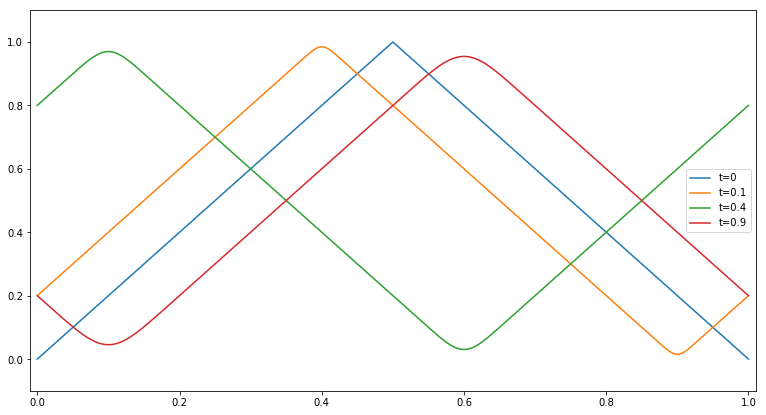

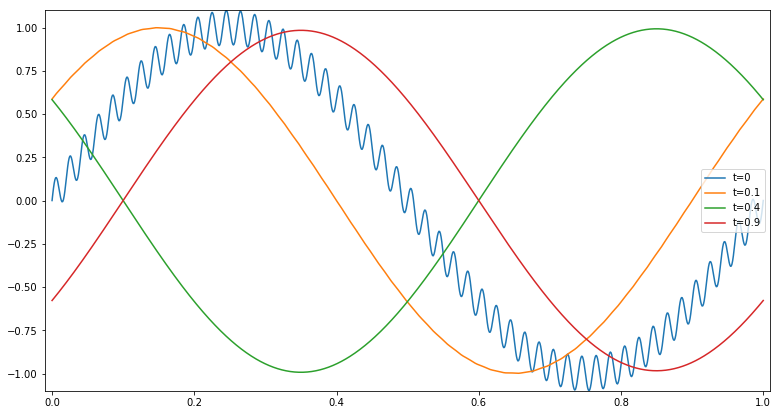

In [10]:
ots = 0.01
z = np.zeros((N+1))
for i in range(0,N+1):
    z[i]=h*i
plt.figure(figsize=(13,7))
plt.axis([-ots,1+ots,-1+floor(nu/2)-10*ots,1+10*ots])
#plt.grid(True)
plt.plot(z,v01,z,vt11,z,vt21,z,v1)
plt.legend(('t=0','t='+str(t1),'t='+str(t2),'t='+str(t3)), loc = 5)
plt.figure(figsize=(13,7))
plt.axis([-ots,1+ots,-1+floor(nu/3)-10*ots,1+10*ots])
#plt.grid(True)
plt.plot(z,v02,z,vt12,z,vt22,z,v2)
plt.legend(('t=0','t='+str(t1),'t='+str(t2),'t='+str(t3)), loc = 5)
plt.show()

plot(v1,0,1)